# Домашнее Задание, Ишков Денис, ИУ5-24М, 2021г.

## по дисциплине «Методы машинного обучения»

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения с учителем. Домашнее задание включает выполнение следующих шагов:

1. Поиск и выбор набора данных для построения модели машинного обучения. На основе выбранного набора данных строится модель машинного обучения для решения или задачи классификации, или задачи регрессии.

2. Для выбранного датасета (датасетов) на основе материалов лекций, в целях улучшения выборки, решить следующие задачи (если это необходимо в данном датасете):
* устранение пропусков в данных;
* кодирование категориальных признаков;
* нормализацию числовых признаков;
* масштабирование признаков;
* обработку выбросов для числовых признаков;
* обработку нестандартных признаков (которые не является числовым или категориальным);
* отбор признаков, наиболее подходящих для построения модели;
* устранение дисбаланса классов в случае решения задачи классификации на дисбалансированной выборке.

3. Обучить модель и оценить метрики качества для двух выборок :
* исходная выборка, которая содержит только минимальную предобработку данных, необходимую для построения модели (например, кодирование категориальных признаков).
* улучшенная выборка, полученная в результате полной предобработки данных в пункте 2.

4. Построить модель с использованием произвольной библиотеки AutoML.
5. Сравнить метрики для трех полученных моделей.

## Отчет по домашнему заданию
Отчет по домашнему заданию должен содержать:
* Титульный лист.
* Постановку задачи машинного обучения.
* Описание последовательности действий студента по решению задачи машинного обучения.
* Выводы.



# 1. Поиск и выбор набора данных для построения модели машинного обучения

Краткое описание данных: предлагается поработать над предсказанием погоды в Австралии, будет ли завтра дождь или нет.

Основные признаки:

* Date - Дата наблюдений
* Location - Название локации, в которой расположена метеорологическая станция
* MinTemp - Минимальная температура в градусах цельсия
* MaxTemp - Максимальная температура в градусах цельсия
* Rainfall - Количество осадков, зафиксированных за день в мм
* Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
* Sunshine - Число солнечных часов за день
* WindGustDir - направление самого сильного порыва ветра за последние 24 часа
* WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
* WindDir9am - направление ветра в 9 утра

In [1]:
!pip install wldhx.yadisk-direct
!curl -L $(yadisk-direct https://disk.yandex.ru/i/2bePAZi16dhUAg) -o weatherAUS.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 13.5M  100 13.5M    0     0  2036k      0  0:00:06  0:00:06 --:--:-- 2854k


In [72]:
!pip install imbalanced-learn==0.8.0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import KMeansSMOTE
%matplotlib inline

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
# Разделение на тестовую и обучающую выборки 
train_part = df.RainTomorrow.size*75//100
df_train = df.iloc[:train_part].copy()
df_test = df.iloc[train_part:].copy()
del df

# 2. Предобработка данных

## Минимальная обработка

In [199]:
# Обработка пропусков
bad_cols = []
for col in df_train.columns:
    print(col,
          round(100*df_train[col].isna().sum()/df_train.shape[0], 3),
          round(100*df_test[col].isna().sum()/df_train.shape[0], 3), sep='\t')
        
df_train_min = df_train.copy()
df_test_min = df_test.copy()

print('ДО:', df_train_min.shape, df_test_min.shape)
bad_cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RISK_MM']
for col in df_train.columns:
    if df_train_min[col].dtype == 'object':
        fillval = df_train_min.loc[~df_train_min[col].isna(), col].value_counts().index[0]
    else:
        fillval = df_train_min.loc[~df_train_min[col].isna(), col].mean()
    df_train_min.loc[df_train_min[col].isna(), col] = fillval
    df_test_min.loc[df_test_min[col].isna(), col] = fillval
df_train_min.drop(columns=bad_cols, inplace=True)
df_test_min.drop(columns=bad_cols, inplace=True)
print('ПОСЛЕ:', df_train_min.shape, df_test_min.shape)

Date	0.0	0.0
Location	0.0	0.0
MinTemp	0.452	0.145
MaxTemp	0.216	0.086
Rainfall	1.057	0.262
Evaporation	41.55	15.502
Sunshine	48.701	14.89
WindGustDir	6.102	2.647
WindGustSpeed	6.08	2.612
WindDir9am	7.651	1.738
WindDir3pm	2.58	0.963
WindSpeed9am	1.116	0.148
WindSpeed3pm	1.693	0.773
Humidity9am	1.245	0.418
Humidity3pm	1.651	1.734
Pressure9am	9.126	4.015
Pressure3pm	9.084	4.026
Cloud9am	36.499	13.815
Cloud3pm	38.445	15.092
Temp9am	0.75	0.098
Temp3pm	1.199	1.357
RainToday	1.057	0.262
RISK_MM	0.0	0.0
RainTomorrow	0.0	0.0
ДО: (106644, 24) (35549, 24)
ПОСЛЕ: (106644, 19) (35549, 19)


In [200]:
# Кодирование категориальных признаков
for col in df_train_min.columns:
    print(col, df_test_min[col].dtype, sep='\t')
cat_cols = ['Location', 'WindDir9am', 'WindDir3pm',
            'WindGustDir', 'RainToday', 'RainTomorrow']
for col in cat_cols:
    vals = pd.concat([df_train_min, df_test_min])[col].unique()
    vals.sort()
    vals = list(vals)
    print(vals)
    df_train_min[col] = df_train_min[col].apply(lambda x: vals.index(x))
    df_test_min[col] = df_test_min[col].apply(lambda x: vals.index(x))

Date	object
Location	object
MinTemp	float64
MaxTemp	float64
Rainfall	float64
WindGustDir	object
WindGustSpeed	float64
WindDir9am	object
WindDir3pm	object
WindSpeed9am	float64
WindSpeed3pm	float64
Humidity9am	float64
Humidity3pm	float64
Pressure9am	float64
Pressure3pm	float64
Temp9am	float64
Temp3pm	float64
RainToday	object
RainTomorrow	object
['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']
['E', 'ENE', 'ESE', 'N', 'NE', 'NN

In [201]:
# Кодирование времени
df_train_min['Date'] = pd.to_datetime(df_train_min.Date)
df_test_min['Date'] = pd.to_datetime(df_test_min.Date)

df_train_min['year'] = df_train_min.Date.dt.year
df_train_min['month'] = df_train_min.Date.dt.month
df_train_min['day'] = df_train_min.Date.dt.day
df_test_min['year'] = df_test_min.Date.dt.year
df_test_min['month'] = df_test_min.Date.dt.month
df_test_min['day'] = df_test_min.Date.dt.day

df_train_min.drop(columns=['Date'], inplace=True)
df_test_min.drop(columns=['Date'], inplace=True)

In [202]:
X_min = df_train_min[[c for c in df_train_min if c!='RainTomorrow']]
y_min = df_train_min.RainTomorrow
X_t_min = df_test_min[[c for c in df_test_min if c!='RainTomorrow']]
y_t_min = df_test_min.RainTomorrow

In [203]:
df_test_min.head().T

,106644,106645,106646,106647,106648
Location,1.000000,1.000000,1.000000,1.000000,1.000000
MinTemp,9.800000,11.200000,13.500000,7.900000,6.800000
MaxTemp,28.300000,27.400000,17.800000,15.000000,17.400000
Rainfall,0.000000,0.000000,0.600000,20.600000,0.000000
WindGustDir,13.000000,13.000000,13.000000,13.000000,13.000000
WindGustSpeed,39.797634,39.797634,39.797634,39.797634,39.797634
WindDir9am,5.000000,12.000000,15.000000,15.000000,9.000000
WindDir3pm,9.000000,15.000000,12.000000,12.000000,8.000000
WindSpeed9am,6.000000,6.000000,4.000000,19.000000,7.000000
WindSpeed3pm,19.000000,37.000000,37.000000,17.000000,15.000000


## Максимальная обработка

In [204]:
# Обработка пропусков
for col in df_train.columns:
    print(col,
          round(100*df_train[col].isna().sum()/df_train.shape[0], 3),
          round(100*df_test[col].isna().sum()/df_train.shape[0], 3), sep='\t')
df_train_max = df_train.copy()
df_test_max = df_test.copy()

print('ДО:', df_train_max.shape, df_test_max.shape)
bad_cols = ['RISK_MM']

# Заполнение константой
for col in df_train.columns:
    fill_value = -100
    if df_train_max[col].dtype=='object':
        fill_value = 'n/a'
    df_train_max[col].fillna(fill_value, inplace=True)
    df_test_max[col].fillna(fill_value, inplace=True)

print('ПОСЛЕ:', df_train_max.shape, df_test_max.shape)

Date	0.0	0.0
Location	0.0	0.0
MinTemp	0.452	0.145
MaxTemp	0.216	0.086
Rainfall	1.057	0.262
Evaporation	41.55	15.502
Sunshine	48.701	14.89
WindGustDir	6.102	2.647
WindGustSpeed	6.08	2.612
WindDir9am	7.651	1.738
WindDir3pm	2.58	0.963
WindSpeed9am	1.116	0.148
WindSpeed3pm	1.693	0.773
Humidity9am	1.245	0.418
Humidity3pm	1.651	1.734
Pressure9am	9.126	4.015
Pressure3pm	9.084	4.026
Cloud9am	36.499	13.815
Cloud3pm	38.445	15.092
Temp9am	0.75	0.098
Temp3pm	1.199	1.357
RainToday	1.057	0.262
RISK_MM	0.0	0.0
RainTomorrow	0.0	0.0
ДО: (106644, 24) (35549, 24)
ПОСЛЕ: (106644, 24) (35549, 24)


In [205]:
# Кодирование категориальных признаков
for col in df_train_max.columns:
    print(col, df_test_max[col].dtype, sep='\t')
cat_cols = ['WindDir9am', 'WindDir3pm',
            'WindGustDir', 'RainToday', 'RainTomorrow']
for col in cat_cols:
    vals = pd.concat([df_train_max, df_test_max])[col].unique()
    vals.sort()
    vals = list(vals)
    if len(vals) > 2:
        df_train_max = pd.concat([df_train_max,
                                  pd.get_dummies(df_train_max[col], prefix=col, drop_first=True)], axis=1)
        df_test_max = pd.concat([df_test_max,
                                 pd.get_dummies(df_test_max[col], prefix=col, drop_first=True)], axis=1)
    else:
        df_train_max[col+'_LE'] = df_train_max[col].apply(lambda x: vals.index(x))
        df_test_max[col+'_LE'] = df_test_max[col].apply(lambda x: vals.index(x))
    print(vals)

Date	object
Location	object
MinTemp	float64
MaxTemp	float64
Rainfall	float64
Evaporation	float64
Sunshine	float64
WindGustDir	object
WindGustSpeed	float64
WindDir9am	object
WindDir3pm	object
WindSpeed9am	float64
WindSpeed3pm	float64
Humidity9am	float64
Humidity3pm	float64
Pressure9am	float64
Pressure3pm	float64
Cloud9am	float64
Cloud3pm	float64
Temp9am	float64
Temp3pm	float64
RainToday	object
RISK_MM	float64
RainTomorrow	object
['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'n/a']
['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'n/a']
['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW', 'n/a']
['No', 'Yes', 'n/a']
['No', 'Yes']


In [206]:
# масштабирование признаков
# box-cox
for col in ['Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    df_train_max.loc[df_train_max[col]<0, col] = 1e10
    df_test_max.loc[df_test_max[col]<0, col] = 1e10
    df_train_max[col] = np.log(1+df_train_max[col])
    df_test_max[col] = np.log(1+df_test_max[col])
    df_train_max.loc[df_train_max[col]>np.log(1e10), col] = -100
    df_test_max.loc[df_test_max[col]>np.log(1e10), col] = -100
# humidity features
df_train_max['Humidity9amIS100'] = df_train_max['Humidity9am'] == 100
df_train_max['Humidity3pmMOD10'] = df_train_max['Humidity3pm'] % 10 == 0
df_test_max['Humidity9amIS100'] = df_test_max['Humidity9am'] == 100
df_test_max['Humidity3pmMOD10'] = df_test_max['Humidity3pm'] % 10 == 0

In [207]:
# кодирование сложных признаков
coordinates_latitude = dict(Cobar=31.4958,
                            CoffsHarbour=30.2986,
                            Moree=29.4658,
                            NorfolkIsland=29.0408,
                            Sydney=33.8688,
                            SydneyAirport=33.9399,
                            WaggaWagga=35.1082,
                            Williamtown=32.8150,
                            Canberra=35.2809,
                            Sale=38.1026,
                            MelbourneAirport=37.6690,
                            Melbourne=37.8136,
                            Mildura=34.2080,
                            Portland=45.5051,
                            Watsonia=37.7080,
                            Brisbane=27.4705,
                            Cairns=16.9186,
                            Townsville=19.2590,
                            MountGambier=37.8284,
                            Nuriootpa=34.4666,
                            Woomera=31.1656)
coordinates_longitude = dict(Cobar=145.8389,
                            CoffsHarbour=153.1094,
                            Moree=149.8339,
                            NorfolkIsland=167.9547,
                            Sydney=151.2093,
                            SydneyAirport=151.1753,
                            WaggaWagga=147.3598,
                            Williamtown=151.8428,
                            Canberra=149.1300,
                            Sale=147.0730,
                            MelbourneAirport=144.8410,
                            Melbourne=144.9631,
                            Mildura=142.1246,
                            Portland=122.6750,
                            Watsonia=145.0830,
                            Brisbane=153.0260,
                            Cairns=145.7781,
                            Townsville=146.8169,
                            MountGambier=140.7804,
                            Nuriootpa=138.9917,
                            Woomera=136.8193)
# wind direction
# http://snowfence.umn.edu/Components/winddirectionanddegrees.htm

map_direction = dict(E=90, ENE=67.5, ESE=110, N=0, NE=45,
                     NNE=20, NNW=335, NW=315, S=180, SE=135,
                     SSE=155, SSW=200, SW=225, W=270,
                     WNW=290, WSW=245)

cols_directions = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
# directions encoding
for col in cols_directions:
    df_train_max[col+'Degrees'] = df_train_max[col].apply(lambda x: map_direction.get(x, 1000))
    df_train_max[col+'Sin'] = np.sin(df_train_max[col+'Degrees']*np.pi/180)

    df_test_max[col+'Degrees'] = df_test_max[col].apply(lambda x: map_direction.get(x, 1000))
    df_test_max[col+'Sin'] = np.sin(df_test_max[col+'Degrees']*np.pi/180)
# coordinates features
df_train_max['latitude'] = df_train_max['Location'].apply(lambda x:
                                            coordinates_latitude.get(x, 25.2744))
df_train_max['longitude'] = df_train_max['Location'].apply(lambda x:
                                             coordinates_longitude.get(x, 133.7751))

df_test_max['latitude'] = df_test_max['Location'].apply(lambda x:
                                            coordinates_latitude.get(x, 25.2744))
df_test_max['longitude'] = df_test_max['Location'].apply(lambda x:
                                             coordinates_longitude.get(x, 133.7751))

<AxesSubplot:>

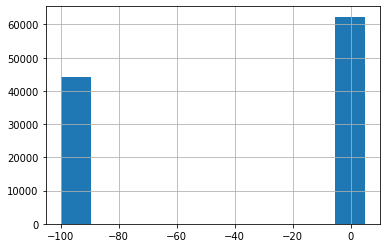

In [208]:
df_train_max.loc[df_train_max.Evaporation < 10, 'Evaporation'].hist()

In [209]:
# Кодирование времени
df_train_max['Date'] = pd.to_datetime(df_train_max.Date)
df_test_max['Date'] = pd.to_datetime(df_test_max.Date)

df_train_max['year'] = df_train_max.Date.dt.year
df_train_max['month'] = df_train_max.Date.dt.month
df_train_max['day'] = df_train_max.Date.dt.day
df_test_max['year'] = df_test_max.Date.dt.year
df_test_max['month'] = df_test_max.Date.dt.month
df_test_max['day'] = df_test_max.Date.dt.day

time_cols = ['month', 'day']
df_train_max = pd.concat([df_train_max]+
                         [pd.get_dummies(df_train_max[col], prefix=col, drop_first=True) for col in time_cols],
                         axis=1)
df_test_max = pd.concat([df_test_max]+
                        [pd.get_dummies(df_test_max[col], prefix=col, drop_first=True) for col in time_cols],
                         axis=1)


df_train_max.drop(columns=['Date', 'Location', 'RISK_MM']+time_cols, inplace=True)
df_test_max.drop(columns=['Date', 'Location', 'RISK_MM']+time_cols, inplace=True)
o_cols = [col for col in df_test_max if df_test_max[col].dtype=='object']
df_train_max.drop(columns=o_cols, inplace=True)
df_test_max.drop(columns=o_cols, inplace=True)

In [210]:
# нормализация числовых признаков
float_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
              'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
              'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
              'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
              'WindGustDirDegrees', 'WindDir9amDegrees', 'WindDir3pmDegrees',
              'latitude', 'longitude', 'year']


rs = RobustScaler().fit(df_train_max.loc[(df_train_max[float_cols]>0).all(axis=1), float_cols])
df_train_max[float_cols] = rs.transform(df_train_max[float_cols])
df_test_max[float_cols] = rs.transform(df_test_max[float_cols])

In [211]:
# устранение дисбаланса классов в случае решения задачи классификации на дисбалансированной выборке
print(df_train_max.RainTomorrow_LE.value_counts())
print('Как видно из распределения, целевой признак несбалансирован.\nИсправим это')
X = df_train_max[[c for c in df_train_max if c!='RainTomorrow_LE']]
Y = df_train_max.RainTomorrow_LE

X_t = df_test_max[[c for c in df_test_max if c!='RainTomorrow_LE']]
Y_t = df_test_max.RainTomorrow_LE

smote = KMeansSMOTE(cluster_balance_threshold=Y.sum()/Y.size-0.01,
                    sampling_strategy='not majority',
                    random_state=69)
Xr, yr = smote.fit_resample(X, Y)
pd.Series(yr).value_counts()

0    82434
1    24210
Name: RainTomorrow_LE, dtype: int64
Как видно из распределения, целевой признак несбалансирован.
Исправим это


1    82436
0    82434
Name: RainTomorrow_LE, dtype: int64

# 3. Обучение модели и оценка метрик качества для двух выборок

In [190]:
from functools import lru_cache
from tqdm.notebook import tqdm

@lru_cache(maxsize=100)
def get_folds(train_ind, test_ind):
    train_ind = list(train_ind)
    test_ind = list(test_ind)
    x_tr = x.values[train_ind].copy()
    x_t = x.values[test_ind].copy()
    y_tr = y.values[train_ind].copy()
    y_t = y.values[test_ind].copy()
    smote = KMeansSMOTE(cluster_balance_threshold=y_tr.sum()/y_tr.size-0.01,
                        sampling_strategy='not majority',
                        random_state=69)
    x_tr, y_tr = smote.fit_resample(x_tr, y_tr)
    return (x_tr, y_tr), (x_t, y_t)

for i in tqdm(range(10)):
    for train_ind, test_ind in kfold.split(x, y):
        (x_tr, y_tr), (x_t, y_t) = get_folds(tuple(train_ind), tuple(test_ind))

  0%|          | 0/10 [00:00<?, ?it/s]

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, roc_auc_score

ddd = [[X_min, y_min],
       [X, Y]]

ddd_test = [[X_t_min, y_t_min],
            [X_t, Y_t]]

metainfo = ['simple', 'advanced']


for ((x, y), (xt, yt), info) in zip(ddd, ddd_test, metainfo):
    best_score = 0
#     dt = ComplementNB()
    best_params = {}
    params = {'max_depth': [None],
              'n_estimators': [200, 350]}
    kfold = KFold(n_splits=4, shuffle=True, random_state=69)
    for n_estimators in params['n_estimators']:
        scores = []
        dt = RandomForestClassifier(max_depth=None,
                                    n_estimators=n_estimators,
                                    random_state=69)
        for train_ind, test_ind in kfold.split(x, y):
            if info=='simple':
                (x_tr, y_tr), (x_t, y_t) = (x.values[train_ind], y.values[train_ind]),\
                                           (x.values[test_ind], y.values[test_ind])
            else:
                (x_tr, y_tr), (x_t, y_t) = get_folds(tuple(train_ind), tuple(test_ind))
            dt.fit(x_tr, y_tr)
            scores.append(roc_auc_score(y_t, dt.predict_proba(x_t)[:, 1]))
        print(info, np.mean(scores), n_estimators)
        if np.mean(scores) >= best_score:
            best_score = np.mean(scores)
            best_params[info] = n_estimators
    if info=='simple':
        best_params[info] = RandomForestClassifier(max_depth=None,
                                        n_estimators=best_params[info],
                                        random_state=69).fit(x, y)
    else:
        best_params[info] = RandomForestClassifier(max_depth=None,
                                        n_estimators=best_params[info],
                                        random_state=69).fit(Xr, yr)
    
        
#     dt = GridSearchCV(dt, params,
#                       scoring='roc_auc', cv=kfold,
#                       verbose=False).fit(x, y)
    print(info)
    #print(dt.best_params_)
    print(classification_report(yt, best_params[info].predict(xt), digits=4))
    print('-'*50)

simple 0.879346859718559 200
simple 0.8801368453188253 350
simple
              precision    recall  f1-score   support

           0     0.8603    0.9635    0.9090     27882
           1     0.7646    0.4309    0.5512      7667

    accuracy                         0.8487     35549
   macro avg     0.8125    0.6972    0.7301     35549
weighted avg     0.8397    0.8487    0.8318     35549

--------------------------------------------------
advanced 0.8813584075169003 200
advanced 0.8823846028664184 350
advanced
              precision    recall  f1-score   support

           0     0.8549    0.9696    0.9087     27882
           1     0.7841    0.4017    0.5313      7667

    accuracy                         0.8471     35549
   macro avg     0.8195    0.6857    0.7200     35549
weighted avg     0.8397    0.8471    0.8273     35549

--------------------------------------------------


# 4. AutoML 

In [214]:
!pip install auto-sklearn==0.12.3
from autosklearn import classification

automlcls = classification.AutoSklearnClassifier(time_left_for_this_task=600, n_jobs=-1)
automlcls.fit(X, Y)

/opt/conda/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34069 instead
  http_address["port"], self.http_server.port


AutoSklearnClassifier(n_jobs=-1, per_run_time_limit=240,
                      time_left_for_this_task=600)

In [215]:
automl_predict = automlcls.predict(X_t)

print(classification_report(Y_t, automl_predict, digits=4))

              precision    recall  f1-score   support

           0     0.8596    0.9070    0.8827     27882
           1     0.5771    0.4615    0.5128      7667

    accuracy                         0.8109     35549
   macro avg     0.7184    0.6842    0.6978     35549
weighted avg     0.7987    0.8109    0.8029     35549



# 5. Выводы

In [196]:
#Сравним метрики для трех полученных моделей.

Простая обработка данных показала лучшее качество, нежели сложная с кодированием нестандартных фич.

Лучше всех себя показал случайный лес с неограниченной глубиной и количеством деревьев 350. Скорее всего качество будет расти с дальнейшим увеличением числа деревьев в лесе.

AutmoML с данным ему времененем на подбор алгоритма в 10мин справился хуже на 2-3 % по f1-мере, полноте и точности.

|                 | F1-score     | Recall         | Precision     |
|-----------------|--------------|----------------|---------------|
| Simple          | 0.8318       | 0.8487         |   0.8397      |
| Ultimate        | 0.8273       | 0.8471         |   0.8397      |
| AutoML          | 0.8029       | 0.8109         |   0.7987      |